In [102]:
import numpy as np
import pandas as pd

In [103]:
df = pd.read_csv("delhi_ncr_aqi_dataset.csv")

In [104]:
df.head()

,datetime,date,year,month,day,hour,day_of_week,is_weekend,season,city,...,no2,so2,co,o3,temperature,humidity,wind_speed,visibility,aqi,aqi_category
0,2020-01-01 06:00:00,2020-01-01,2020,1,1,6,Wednesday,0,winter,Delhi,...,119.6,47.7,5.19,12.3,9.4,100,3.6,1.2,500,Severe
1,2020-01-01 12:00:00,2020-01-01,2020,1,1,12,Wednesday,0,winter,Delhi,...,117.9,39.3,4.32,15.8,20.6,50,5.9,1.4,500,Severe
2,2020-01-01 18:00:00,2020-01-01,2020,1,1,18,Wednesday,0,winter,Delhi,...,150.1,36.3,7.13,14.3,12.4,56,4.5,1.1,500,Severe
3,2020-01-01 23:00:00,2020-01-01,2020,1,1,23,Wednesday,0,winter,Delhi,...,142.0,30.3,4.90,13.2,14.4,48,5.8,1.4,500,Severe
4,2020-01-01 06:00:00,2020-01-01,2020,1,1,6,Wednesday,0,winter,Delhi,...,138.4,41.5,7.56,15.4,6.8,100,2.8,0.4,500,Severe


In [105]:
df.shape

(201664, 25)

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201664 entries, 0 to 201663
Data columns (total 25 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   datetime      201664 non-null  object 
 1   date          201664 non-null  object 
 2   year          201664 non-null  int64  
 3   month         201664 non-null  int64  
 4   day           201664 non-null  int64  
 5   hour          201664 non-null  int64  
 6   day_of_week   201664 non-null  object 
 7   is_weekend    201664 non-null  int64  
 8   season        201664 non-null  object 
 9   city          201664 non-null  object 
 10  station       201664 non-null  object 
 11  latitude      201664 non-null  float64
 12  longitude     201664 non-null  float64
 13  pm25          201664 non-null  float64
 14  pm10          201664 non-null  float64
 15  no2           201664 non-null  float64
 16  so2           201664 non-null  float64
 17  co            201664 non-null  float64
 18  o3  

In [107]:
df.isnull().sum()

datetime        0
date            0
year            0
month           0
day             0
hour            0
day_of_week     0
is_weekend      0
season          0
city            0
station         0
latitude        0
longitude       0
pm25            0
pm10            0
no2             0
so2             0
co              0
o3              0
temperature     0
humidity        0
wind_speed      0
visibility      0
aqi             0
aqi_category    0
dtype: int64

In [108]:
df = df.drop(columns=['date', 'year', 'month', 'day', 'hour'])

In [109]:
df.head()

,datetime,day_of_week,is_weekend,season,city,station,latitude,longitude,pm25,pm10,no2,so2,co,o3,temperature,humidity,wind_speed,visibility,aqi,aqi_category
0,2020-01-01 06:00:00,Wednesday,0,winter,Delhi,"Anand Vihar, Delhi",28.6469,77.3164,371.8,739.4,119.6,47.7,5.19,12.3,9.4,100,3.6,1.2,500,Severe
1,2020-01-01 12:00:00,Wednesday,0,winter,Delhi,"Anand Vihar, Delhi",28.6469,77.3164,301.1,588.8,117.9,39.3,4.32,15.8,20.6,50,5.9,1.4,500,Severe
2,2020-01-01 18:00:00,Wednesday,0,winter,Delhi,"Anand Vihar, Delhi",28.6469,77.3164,334.0,602.6,150.1,36.3,7.13,14.3,12.4,56,4.5,1.1,500,Severe
3,2020-01-01 23:00:00,Wednesday,0,winter,Delhi,"Anand Vihar, Delhi",28.6469,77.3164,403.8,841.8,142.0,30.3,4.90,13.2,14.4,48,5.8,1.4,500,Severe
4,2020-01-01 06:00:00,Wednesday,0,winter,Delhi,"Jahangirpuri, Delhi",28.7299,77.1718,433.2,784.7,138.4,41.5,7.56,15.4,6.8,100,2.8,0.4,500,Severe


Converting categorical values into numeric

In [110]:
df = pd.get_dummies(df, columns=['day_of_week', 'season', 'city', 'station', 'aqi_category'],drop_first=True)


In [111]:
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)

In [112]:
df.head()

,datetime,is_weekend,latitude,longitude,pm25,pm10,no2,so2,co,o3,...,"station_RK Puram, Delhi","station_Rohini, Delhi","station_Shadipur, Delhi","station_Siri Fort, Delhi","station_Wazirpur, Delhi",aqi_category_Moderate,aqi_category_Poor,aqi_category_Satisfactory,aqi_category_Severe,aqi_category_Very Poor
0,2020-01-01 06:00:00,0,28.6469,77.3164,371.8,739.4,119.6,47.7,5.19,12.3,...,0,0,0,0,0,0,0,0,1,0
1,2020-01-01 12:00:00,0,28.6469,77.3164,301.1,588.8,117.9,39.3,4.32,15.8,...,0,0,0,0,0,0,0,0,1,0
2,2020-01-01 18:00:00,0,28.6469,77.3164,334.0,602.6,150.1,36.3,7.13,14.3,...,0,0,0,0,0,0,0,0,1,0
3,2020-01-01 23:00:00,0,28.6469,77.3164,403.8,841.8,142.0,30.3,4.90,13.2,...,0,0,0,0,0,0,0,0,1,0
4,2020-01-01 06:00:00,0,28.7299,77.1718,433.2,784.7,138.4,41.5,7.56,15.4,...,0,0,0,0,0,0,0,0,1,0


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201664 entries, 0 to 201663
Data columns (total 55 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   datetime                      201664 non-null  object 
 1   is_weekend                    201664 non-null  int64  
 2   latitude                      201664 non-null  float64
 3   longitude                     201664 non-null  float64
 4   pm25                          201664 non-null  float64
 5   pm10                          201664 non-null  float64
 6   no2                           201664 non-null  float64
 7   so2                           201664 non-null  float64
 8   co                            201664 non-null  float64
 9   o3                            201664 non-null  float64
 10  temperature                   201664 non-null  float64
 11  humidity                      201664 non-null  int64  
 12  wind_speed                    201664 non-nul

In [114]:
df1 = df.iloc[:100,3:15]
df1.head()

,longitude,pm25,pm10,no2,so2,co,o3,temperature,humidity,wind_speed,visibility,aqi
0,77.3164,371.8,739.4,119.6,47.7,5.19,12.3,9.4,100,3.6,1.2,500
1,77.3164,301.1,588.8,117.9,39.3,4.32,15.8,20.6,50,5.9,1.4,500
2,77.3164,334.0,602.6,150.1,36.3,7.13,14.3,12.4,56,4.5,1.1,500
3,77.3164,403.8,841.8,142.0,30.3,4.90,13.2,14.4,48,5.8,1.4,500
4,77.1718,433.2,784.7,138.4,41.5,7.56,15.4,6.8,100,2.8,0.4,500


In [115]:
df1=df1.drop(['so2','o3','visibility','wind_speed'], axis=1)

In [116]:
df1.head()

,longitude,pm25,pm10,no2,co,temperature,humidity,aqi
0,77.3164,371.8,739.4,119.6,5.19,9.4,100,500
1,77.3164,301.1,588.8,117.9,4.32,20.6,50,500
2,77.3164,334.0,602.6,150.1,7.13,12.4,56,500
3,77.3164,403.8,841.8,142.0,4.90,14.4,48,500
4,77.1718,433.2,784.7,138.4,7.56,6.8,100,500


In [117]:
y = df1['aqi']
X = df1.drop('aqi', axis=1)

### Data Preprocessing

In [118]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,np.pi))
X_scaled = scaler.fit_transform(X)

Feature range has been selected as 0 to pi because features are encoded in rotational gates in quantum to ensure meaningful rotation and avoid periodic wrapping issues

In [119]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

scaling - Mean = 0, std = 1

In [120]:
from sklearn.model_selection import train_test_split

X_train , X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [121]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

y_scaler = MinMaxScaler(feature_range=(0, np.pi))

y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = y_scaler.transform(y_test.values.reshape(-1, 1))

### Qiskit training

In [122]:
pip install qiskit

Note: you may need to restart the kernel to use updated packages.


In [123]:
from qiskit.circuit.library import ZZFeatureMap
feature_map = ZZFeatureMap(feature_dimension = X.shape[1])

C:\Users\reetk\AppData\Local\Temp\ipykernel_4276\3426246050.py:2: DeprecationWarning: The class ``qiskit.circuit.library.data_preparation._zz_feature_map.ZZFeatureMap`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. Use the zz_feature_map function as a replacement. Note that this will no longer return a BlueprintCircuit, but just a plain QuantumCircuit.
  feature_map = ZZFeatureMap(feature_dimension = X.shape[1])


In [124]:
pip install pylatexenc

Note: you may need to restart the kernel to use updated packages.


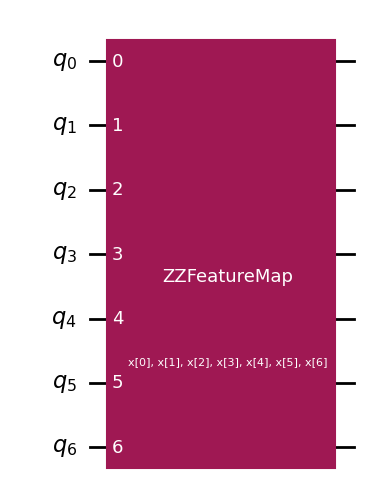

In [125]:
import matplotlib.pyplot as plt
%matplotlib inline
feature_map.draw('mpl')
plt.show()

In [126]:
print(feature_map.decompose())

     ┌───┐┌───────────┐                                             »
q_0: ┤ H ├┤ P(2*x[0]) ├──■──────────────────────────────────■────■──»
     ├───┤├───────────┤┌─┴─┐┌────────────────────────────┐┌─┴─┐  │  »
q_1: ┤ H ├┤ P(2*x[1]) ├┤ X ├┤ P(2*(π - x[0])*(π - x[1])) ├┤ X ├──┼──»
     ├───┤├───────────┤└───┘└────────────────────────────┘└───┘┌─┴─┐»
q_2: ┤ H ├┤ P(2*x[2]) ├────────────────────────────────────────┤ X ├»
     ├───┤├───────────┤                                        └───┘»
q_3: ┤ H ├┤ P(2*x[3]) ├─────────────────────────────────────────────»
     ├───┤├───────────┤                                             »
q_4: ┤ H ├┤ P(2*x[4]) ├─────────────────────────────────────────────»
     ├───┤├───────────┤                                             »
q_5: ┤ H ├┤ P(2*x[5]) ├─────────────────────────────────────────────»
     ├───┤├───────────┤                                             »
q_6: ┤ H ├┤ P(2*x[6]) ├─────────────────────────────────────────────»
     └───┘└─────────

In [127]:
from qiskit.circuit.library import RealAmplitudes

ansatz = RealAmplitudes(num_qubits=X.shape[1], reps=1)

C:\Users\reetk\AppData\Local\Temp\ipykernel_4276\259038224.py:3: DeprecationWarning: The class ``qiskit.circuit.library.n_local.real_amplitudes.RealAmplitudes`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. Use the function qiskit.circuit.library.real_amplitudes instead.
  ansatz = RealAmplitudes(num_qubits=X.shape[1], reps=1)


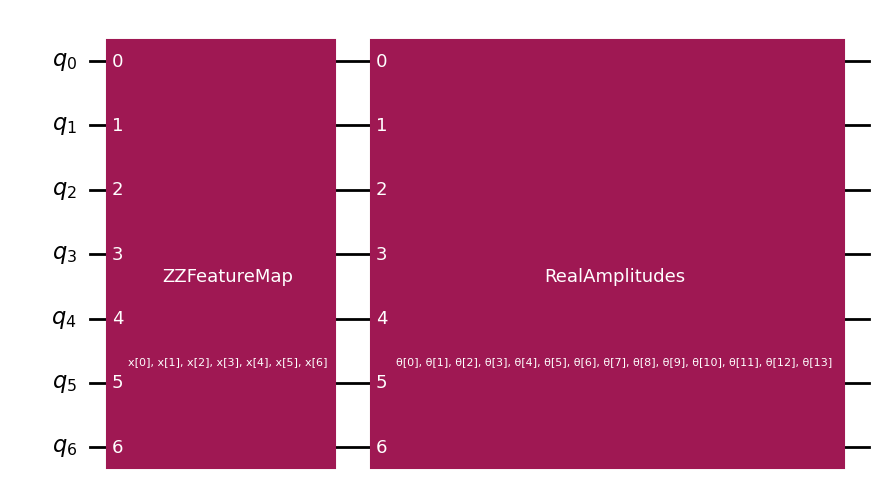

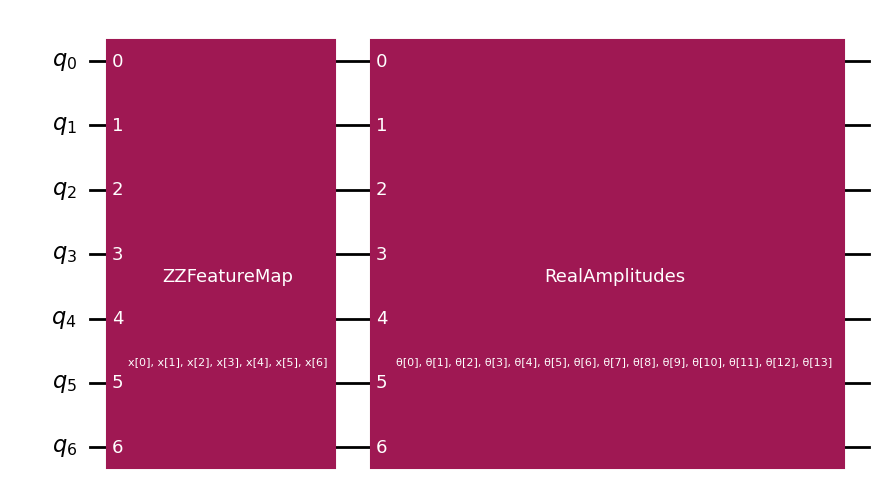

In [128]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(X.shape[1])

qc.compose(feature_map, inplace=True)
qc.compose(ansatz, inplace=True)

qc.draw('mpl')

In [129]:
print(ansatz.decompose())

     ┌──────────┐                                                         »
q_0: ┤ Ry(θ[0]) ├─────────────────────────────────────────────────────────»
     ├──────────┤                                                         »
q_1: ┤ Ry(θ[1]) ├──────────────────────────────────────────────────■──────»
     ├──────────┤                                                ┌─┴─┐    »
q_2: ┤ Ry(θ[2]) ├─────────────────────────────────────■──────────┤ X ├────»
     ├──────────┤                                   ┌─┴─┐    ┌───┴───┴───┐»
q_3: ┤ Ry(θ[3]) ├────────────────────────■──────────┤ X ├────┤ Ry(θ[10]) ├»
     ├──────────┤                      ┌─┴─┐    ┌───┴───┴───┐└───────────┘»
q_4: ┤ Ry(θ[4]) ├───────────■──────────┤ X ├────┤ Ry(θ[11]) ├─────────────»
     ├──────────┤         ┌─┴─┐    ┌───┴───┴───┐└───────────┘             »
q_5: ┤ Ry(θ[5]) ├──■──────┤ X ├────┤ Ry(θ[12]) ├──────────────────────────»
     ├──────────┤┌─┴─┐┌───┴───┴───┐└───────────┘                          »
q_6: ┤ Ry(θ[

In [130]:
pip install qiskit_machine_learning

Note: you may need to restart the kernel to use updated packages.


In [131]:
from qiskit_machine_learning.neural_networks import EstimatorQNN

qnn = EstimatorQNN(
    circuit=qc,
    input_params=feature_map.parameters,
    weight_params=ansatz.parameters
)

No gradient function provided, creating a gradient function. If your Estimator requires transpilation, please provide a pass manager.


In [132]:
pip install qiskit-algorithms


Note: you may need to restart the kernel to use updated packages.


In [133]:
from qiskit_algorithms.optimizers import COBYLA

optimizer = COBYLA(maxiter=100)

In [134]:
from qiskit_machine_learning.algorithms import NeuralNetworkRegressor

model = NeuralNetworkRegressor(
    neural_network=qnn,
    optimizer=optimizer
)

In [135]:
model.fit(X_train, y_train_scaled)

In [136]:
y_pred_scaled = model.predict(X_test)

In [137]:
y_pred = y_scaler.inverse_transform(y_pred_scaled)

In [138]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test_scaled, y_pred_scaled)
mae = mean_absolute_error(y_test_scaled, y_pred_scaled)

print("MSE:", mse)
print("MAE:", mae)

MSE: 7.617640312571405
MAE: 2.606839897514351
